In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
df=pd.read_csv('housePrice.csv', encoding= 'unicode_escape')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


'Area' datatype is object, should be changed to int64.

Handling Area datatype

In [ ]:
df['Area']=df['Area'].str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
#df['Area']=df['Area'].apply(lambda x: re.sub(',', '', x))
#df['Area']=pd.to_numeric(df['Area'], errors="coerce")


#df=df[df['Area'].str.isdigit()]
#df['Area']=df['Area'].astype(float)

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#df.loc[:, 'Price]=df['Price].map('{:, .0f}'.format)

In [ ]:
! pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 7.4 MB/s 


                                             |          | [  0%]   00:00 -> (? left)


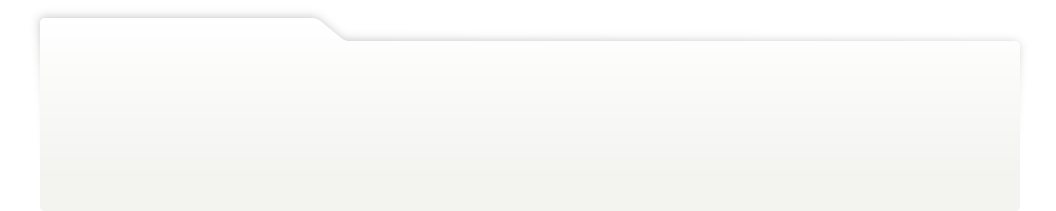
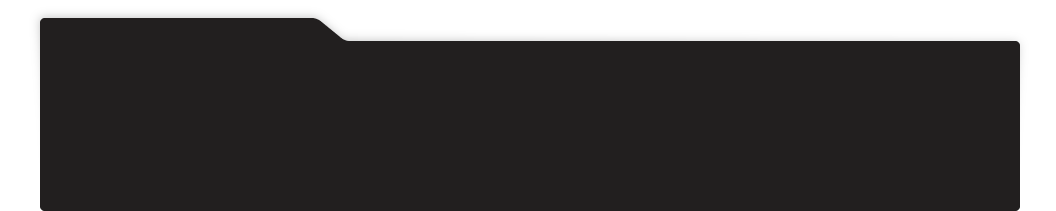
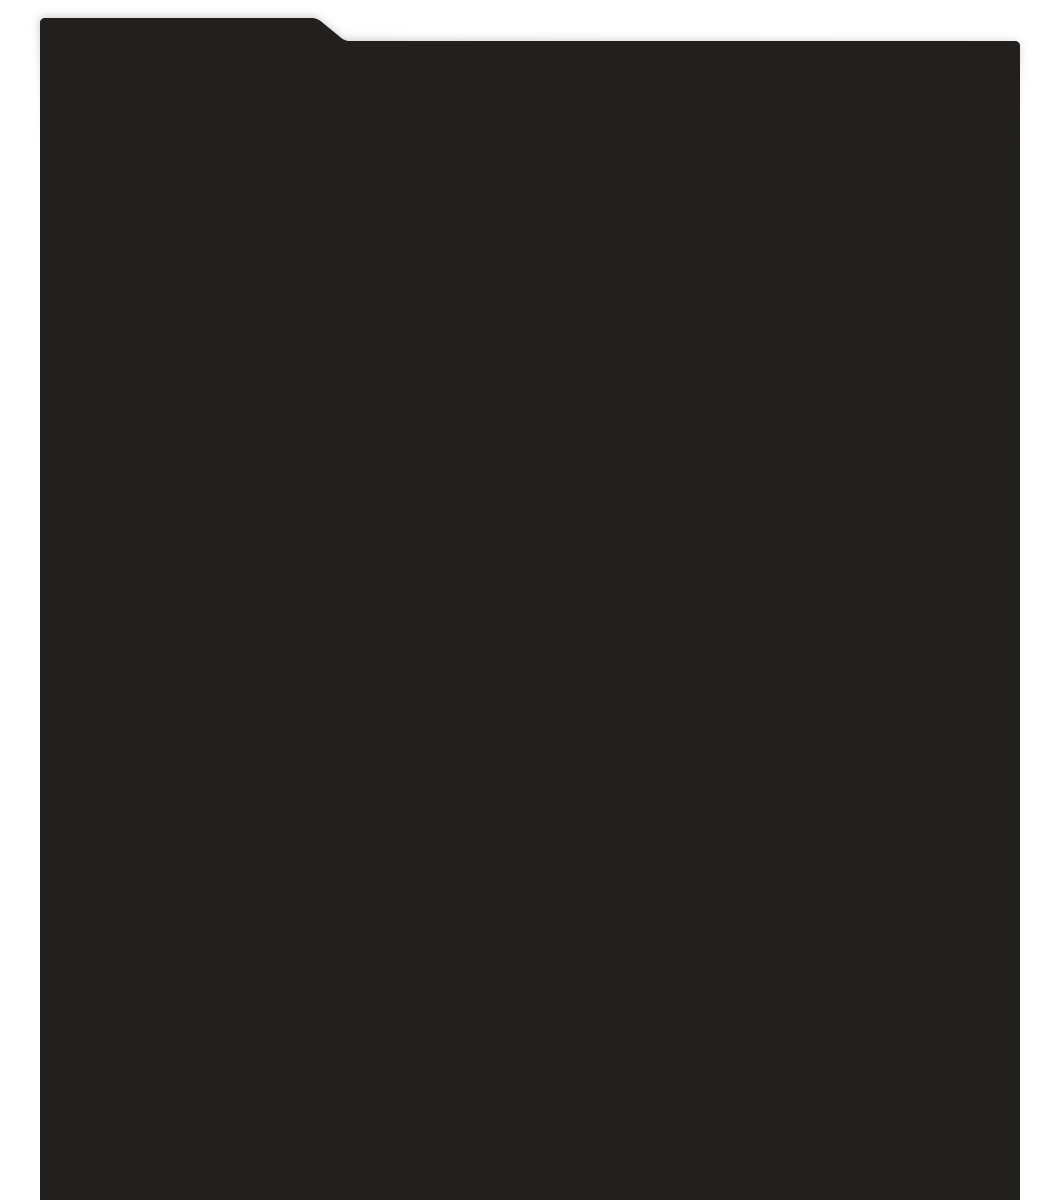
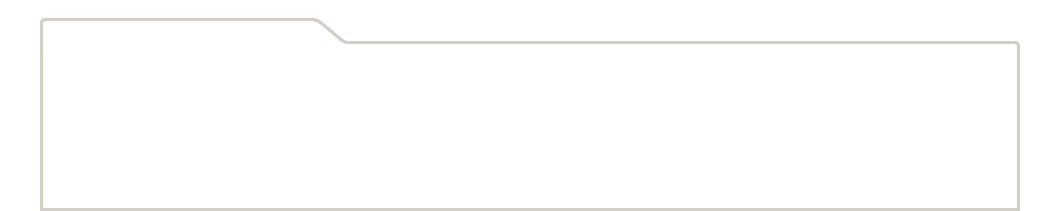
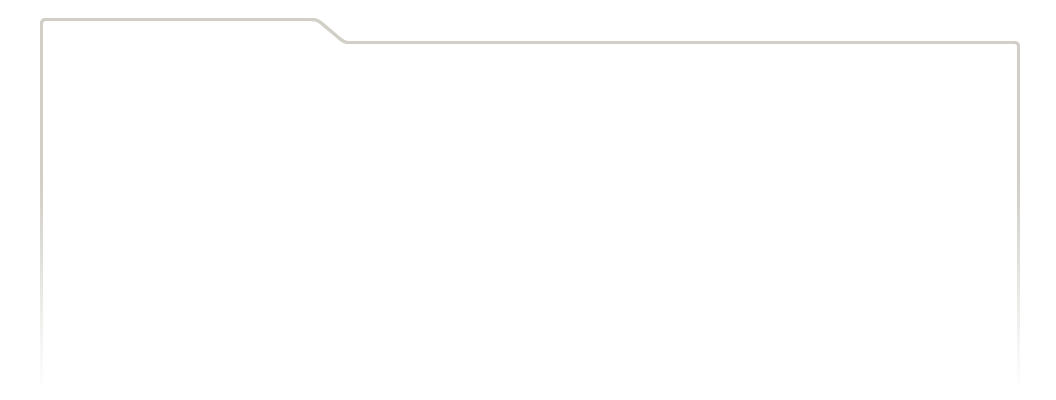
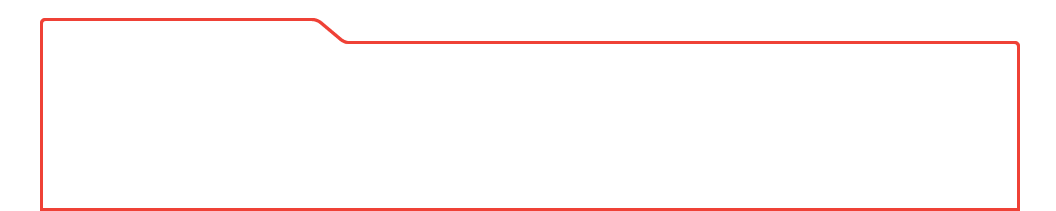
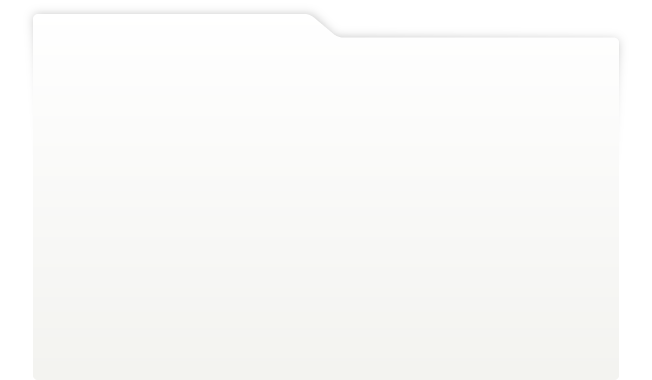
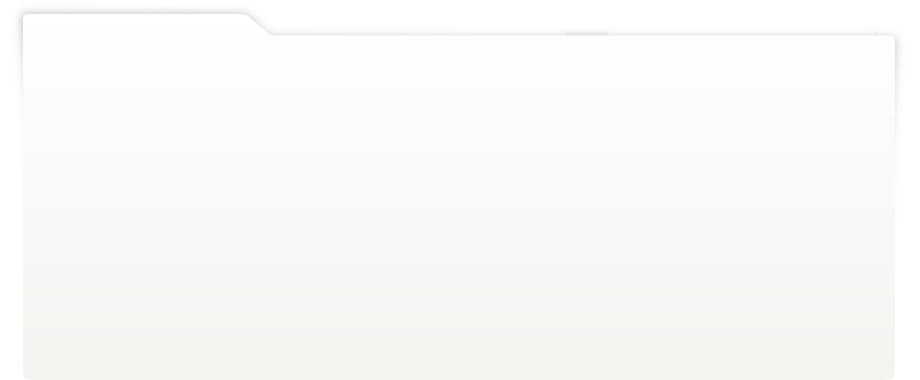
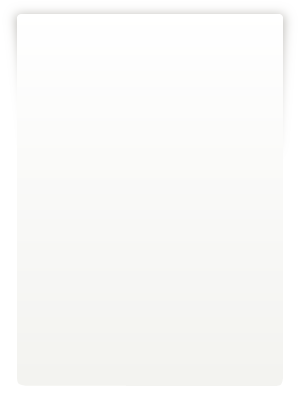
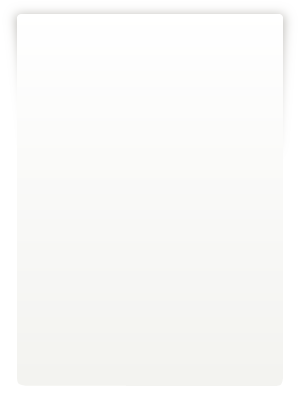
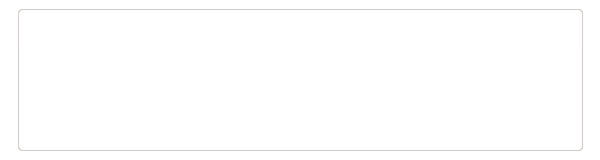
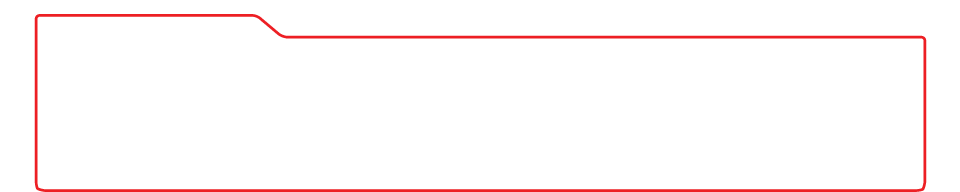
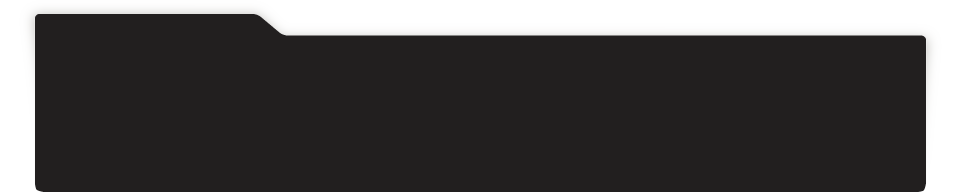
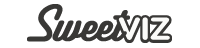
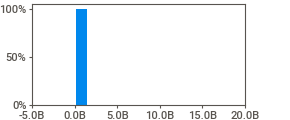
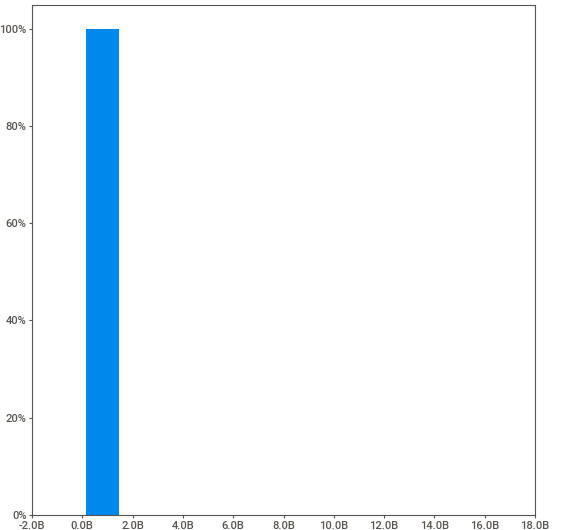
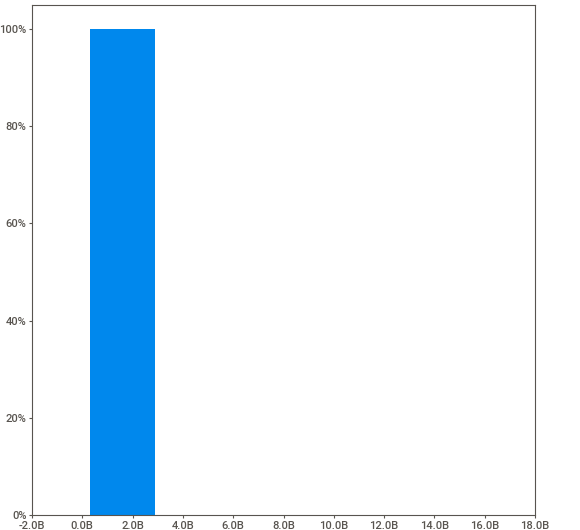
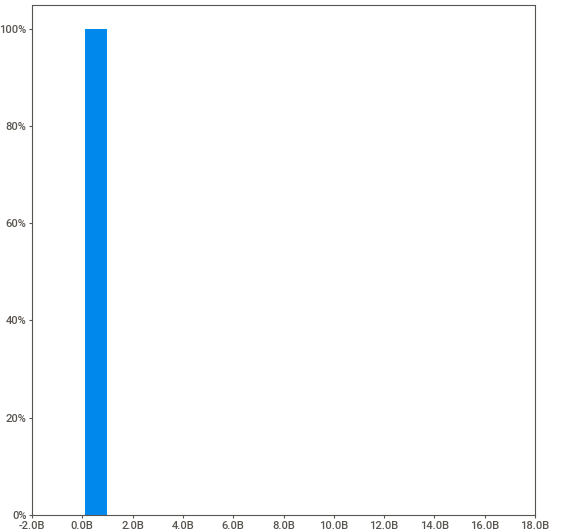
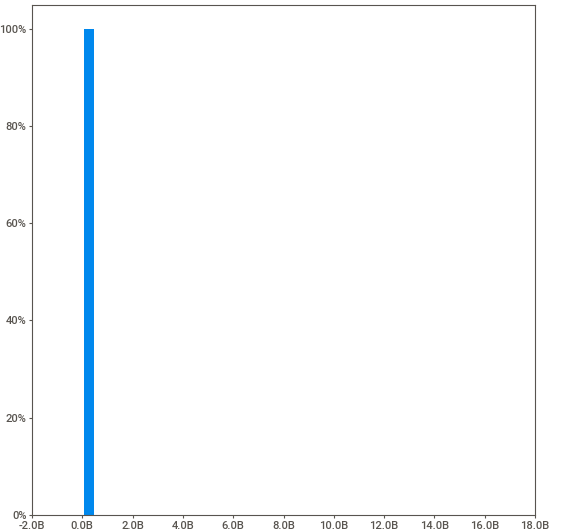
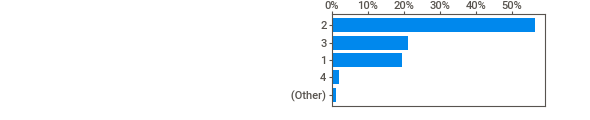
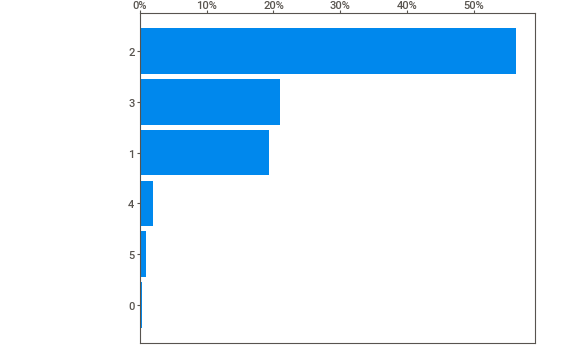
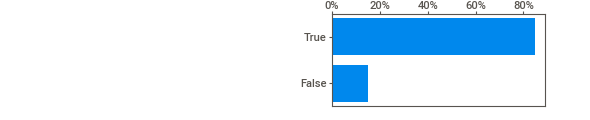
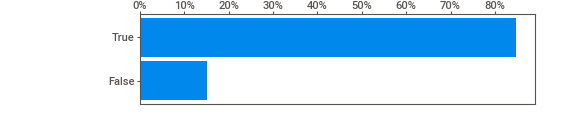
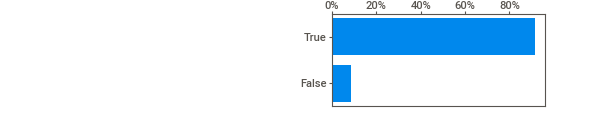
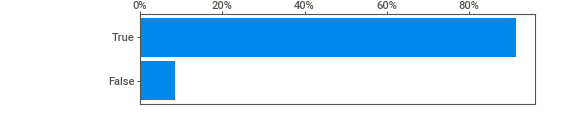
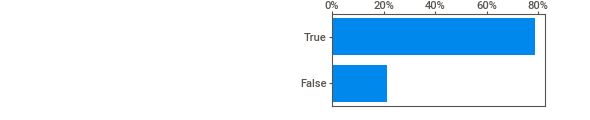
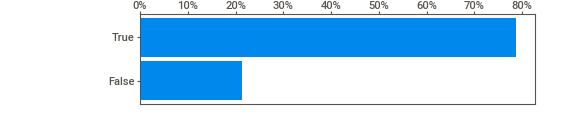
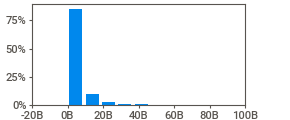
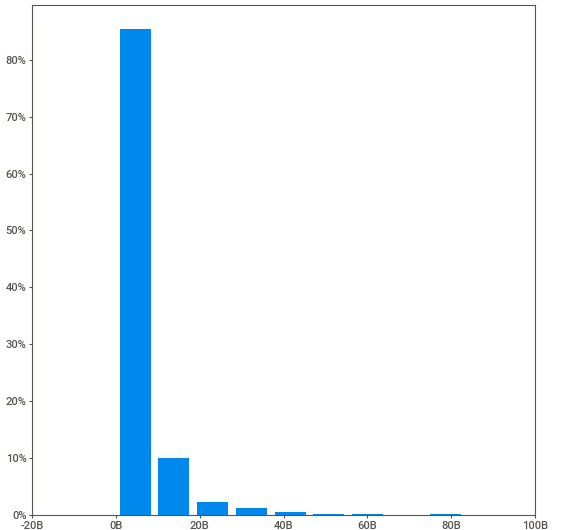
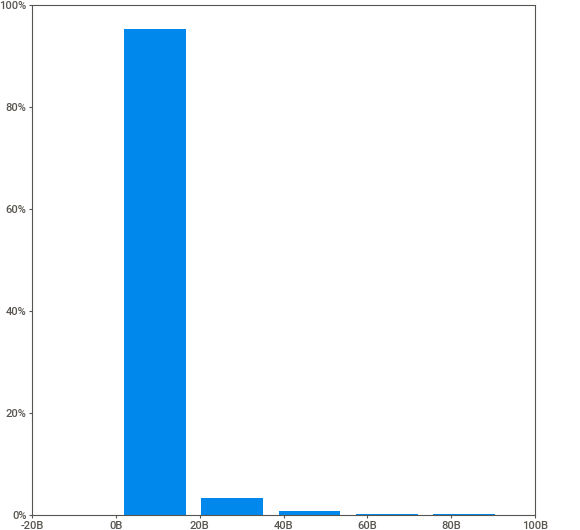
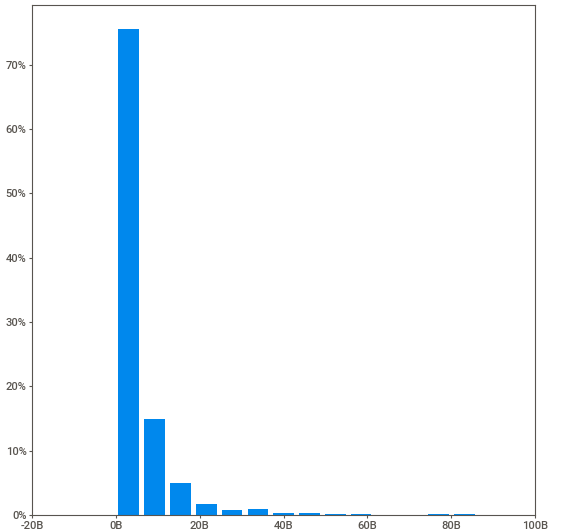
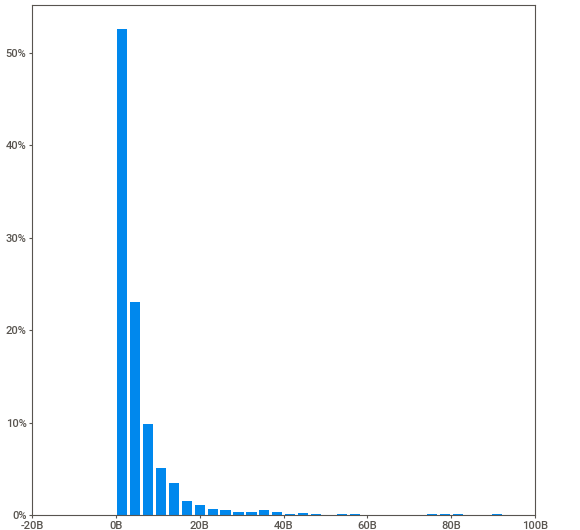
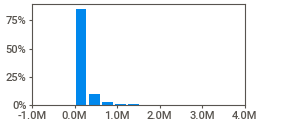
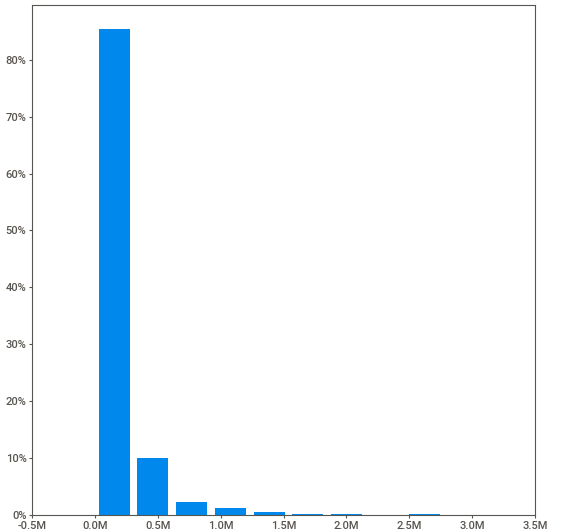
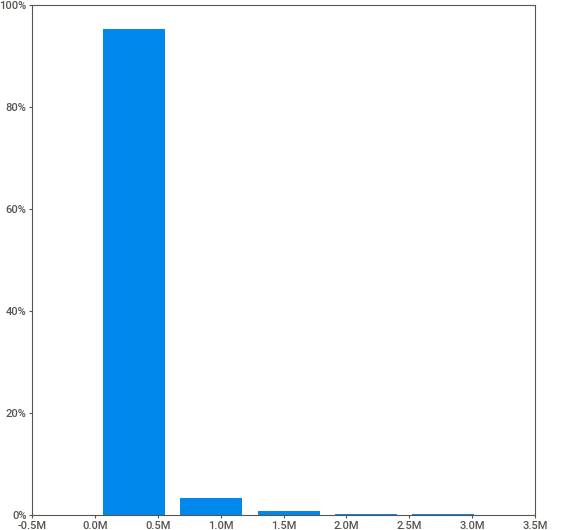
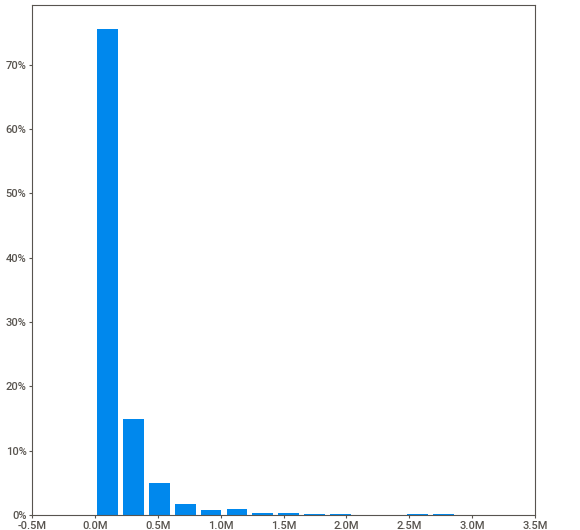
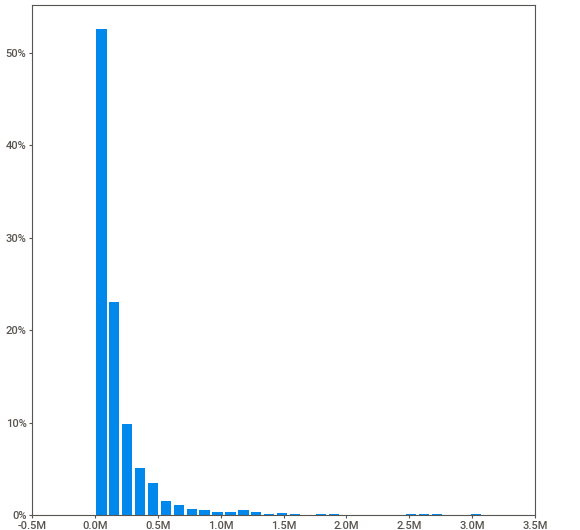
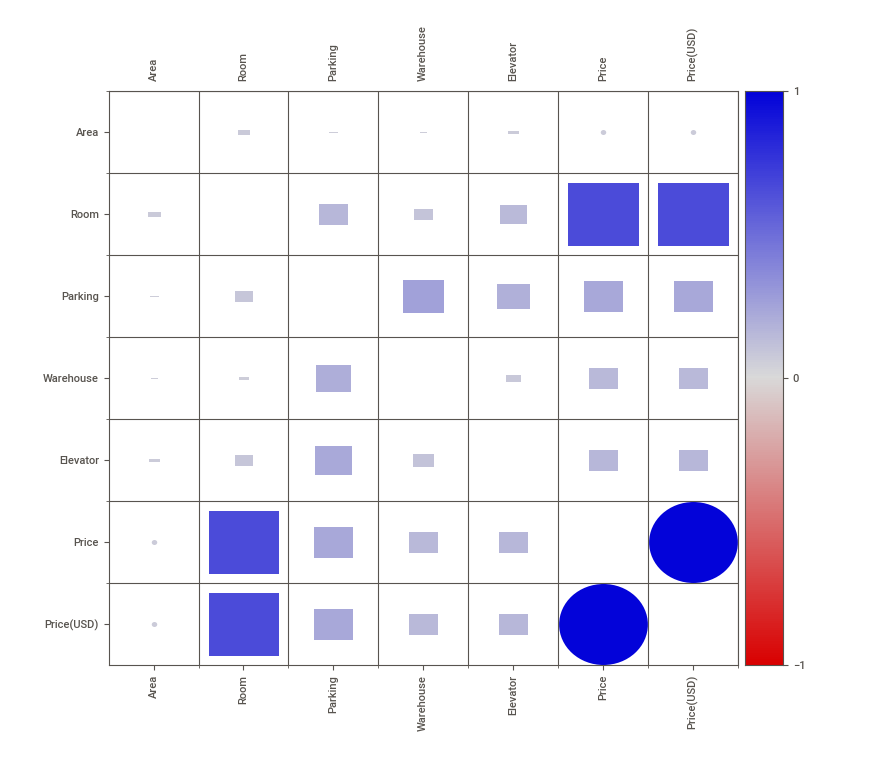
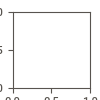

In [ ]:
import sweetviz as sv
report=sv.analyze(df)
report.show_notebook()

Overall view of dataframe:

outlier alert in 'Area'


In [ ]:
df=df[df['Area']<3601]

Converting Area to categorical in sakke of better understanding

In [ ]:
df['Areacat']=pd.cut(df['Area'], bins=[29, 69, 150, 3601], labels=['30-70', '70-150', '>150'])
df['Areacat']=df['Areacat'].astype('object')

Visualizing Areacat feature 

[Text(0, 0.5, 'Area Distribution')]

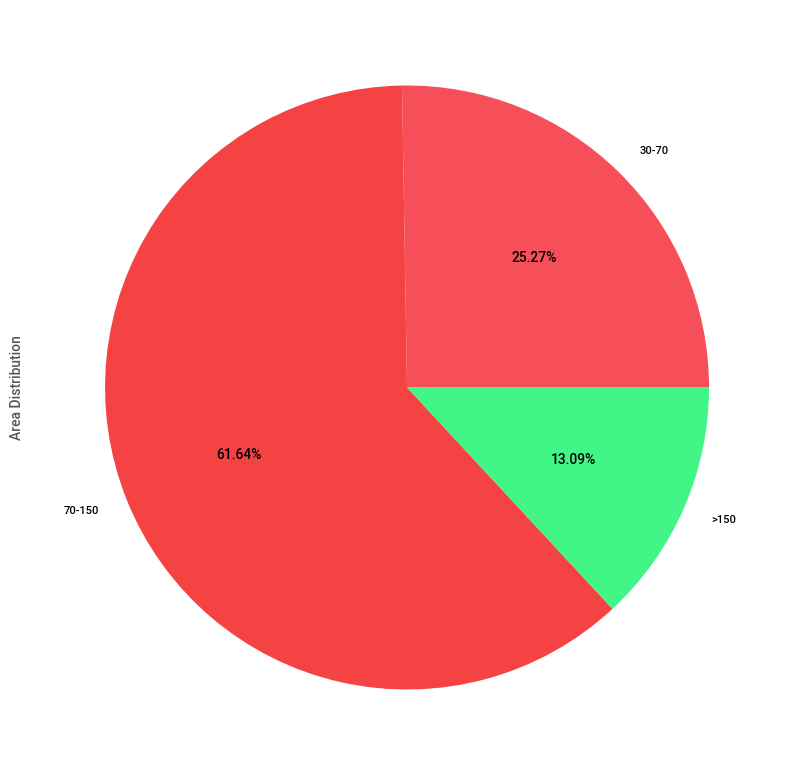

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
colors=['#f64f59', '#f54242', '#42f587', '#42634c']
df.groupby('Areacat').size().plot(kind='pie', autopct='%.2f%%', colors=colors, ax=ax)
ax.set(ylabel='Area Distribution')

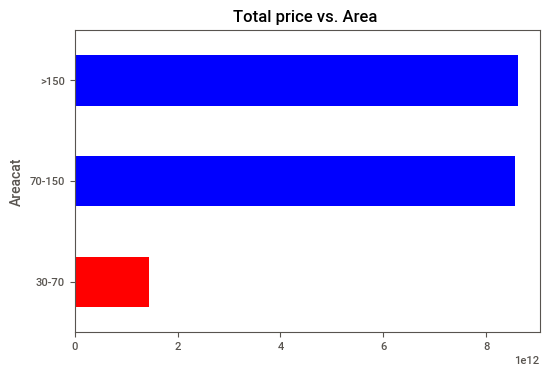

In [ ]:
Areacatprice=df.groupby('Areacat')['Price'].sum().sort_values(ascending=False).plot(kind='barh', color=["blue", 'blue', 'red', 'red', 'red'], title="Total price vs. Area ").invert_yaxis()

In [ ]:
df['Areacat'].value_counts()/len(df['Areacat'])*100

70-150   61.64029
30-70    25.26619
>150     13.09353
Name: Areacat, dtype: float64

Area vs. Parking

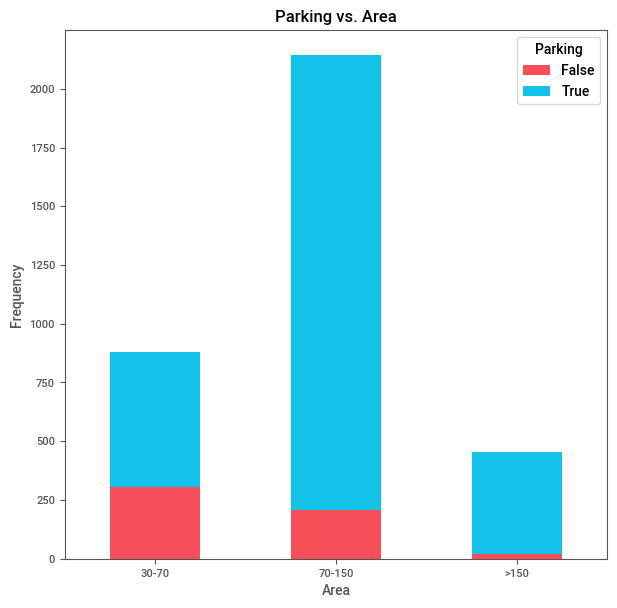

In [ ]:
pd.crosstab(df.Areacat,df.Parking).plot(kind="bar", stacked=True, figsize=(7,7), color=['#f64f59','#12c2e9'])
plt.title('Parking vs. Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Price distribution 

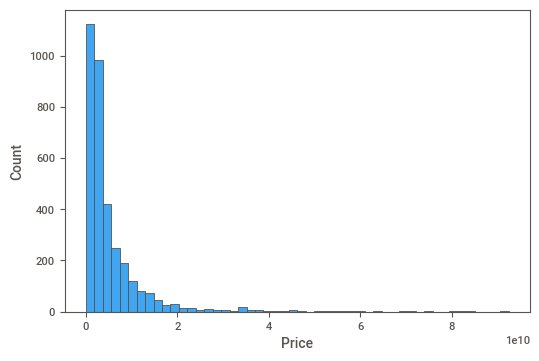

In [ ]:
sns.histplot(data=df, x='Price', bins=50)
plt.show()

Correlation between features

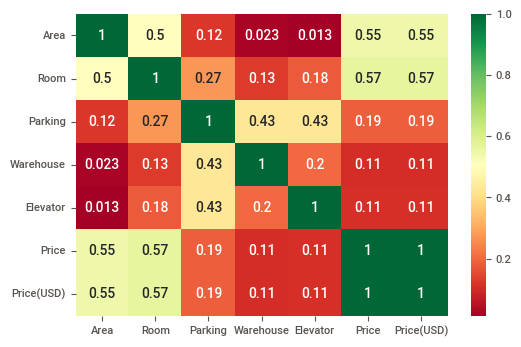

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

As can be seen in the chart, Price and Room have a mild correlation. 

Let's look at the Room and Price relationship by a bar chart

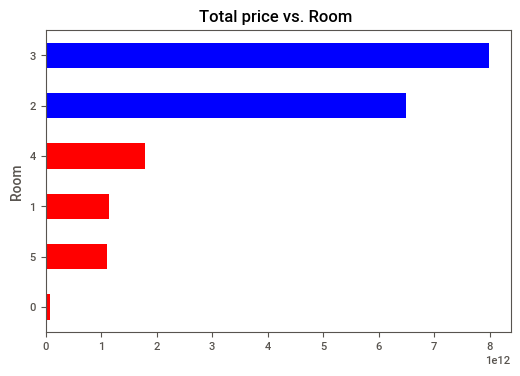

In [ ]:
df.groupby('Room')['Price'].sum().sort_values(ascending=False).plot(kind='barh', color=["blue", 'blue', 'red', 'red', 'red', 'red'], title="Total price vs. Room ").invert_yaxis()

In [ ]:
dfx=df['Address'].value_counts()
Topaddress=dfx[:8]

Top 8 Addresses based on the number of ads

Text(0.5, 0, 'Top 8 Addresses based on number of ads')

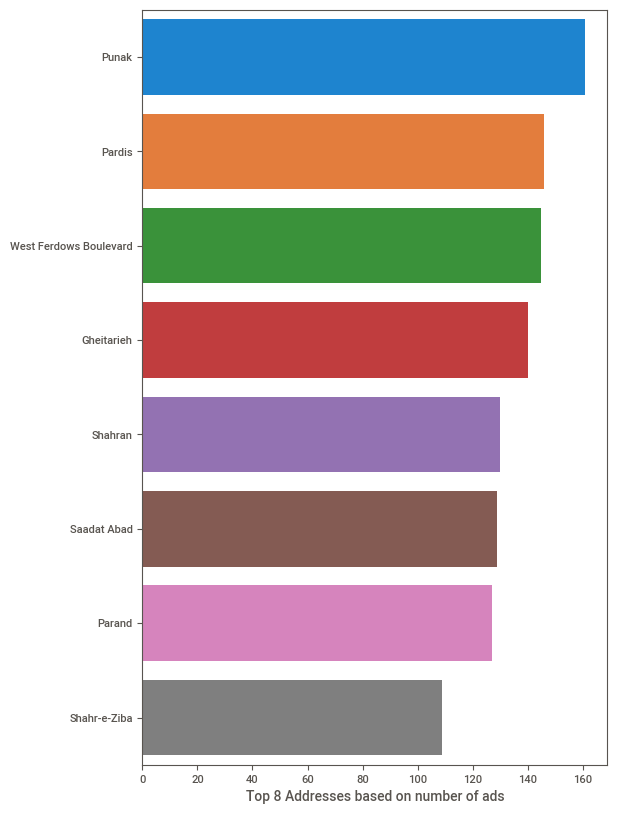

In [ ]:
fig, ax=plt.subplots(figsize=(6, 10))
sns.barplot(x=Topaddress.values, y=Topaddress.index, ax=ax)
plt.xlabel('Top 8 Addresses based on number of ads')


For better understanding, we make a new feature called 'Persquare'

In [ ]:
df['Persquare']=df['Price']/df['Area']
df['Persquare'].describe()

count    3.475000e+03
mean     4.114960e+07
std      3.160988e+07
min      2.250000e+04
25%      2.000000e+07
50%      3.461538e+07
75%      5.487034e+07
max      4.166667e+08
Name: Persquare, dtype: float64

Convert Persquare into categorical

In [ ]:
df['Persquarecat']=pd.cut(df['Persquare'], bins=[22490, 20000001, 54870333, 120000000, 416666667], labels=['low', 'medium', 'high', 'luxury'])
df['Persquarecat']=df['Persquarecat'].astype('object')

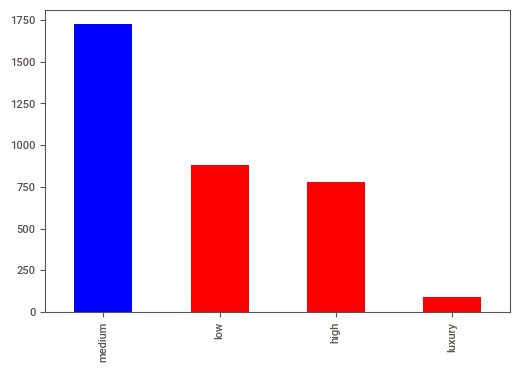

In [ ]:
df['Persquarecat'].value_counts().plot(kind='bar', color=['blue', 'red', 'red', 'red'])

In [ ]:
df['Persquarecat'].value_counts()/len(df['Persquare'])*100

medium   49.64029
low      25.35252
high     22.38849
luxury    2.61871
Name: Persquarecat, dtype: float64

In [ ]:
df["Address"].nunique()

192

In [ ]:
s=df.groupby("Address")["Persquare"].mean().sort_values(ascending=False)
s=s[:8]


Top 8 Addresses based on Persquarre price

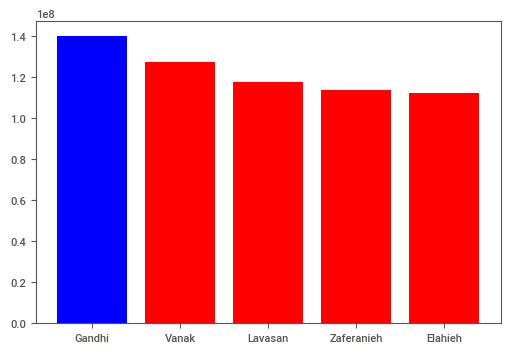

In [ ]:
plt.bar(s.index[:5], s.values[:5], color=['blue', 'red', 'red', 'red', 'red'])
plt.show()

Relationship between Room and Persquare price

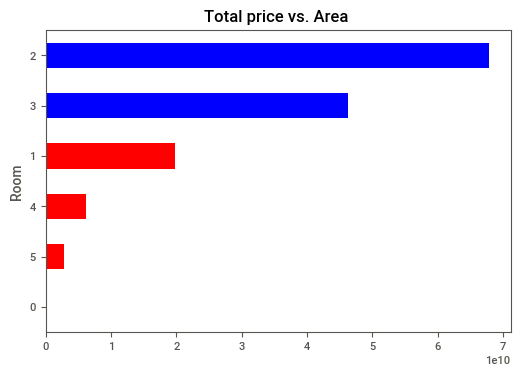

In [ ]:
df.groupby('Room')['Persquare'].sum().sort_values(ascending=False).plot(kind='barh', color=["blue", 'blue', 'red', 'red', 'red'], title="Total price vs. Area ").invert_yaxis()

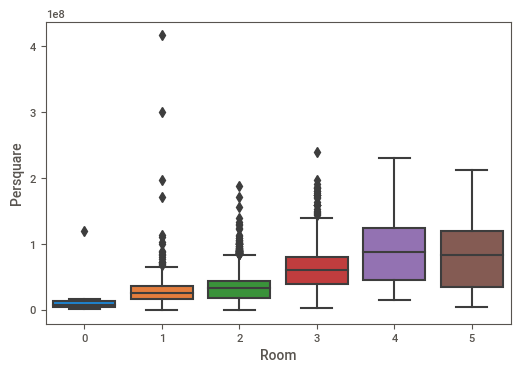

In [ ]:
sns.boxplot(x='Room', y='Persquare', data=df)

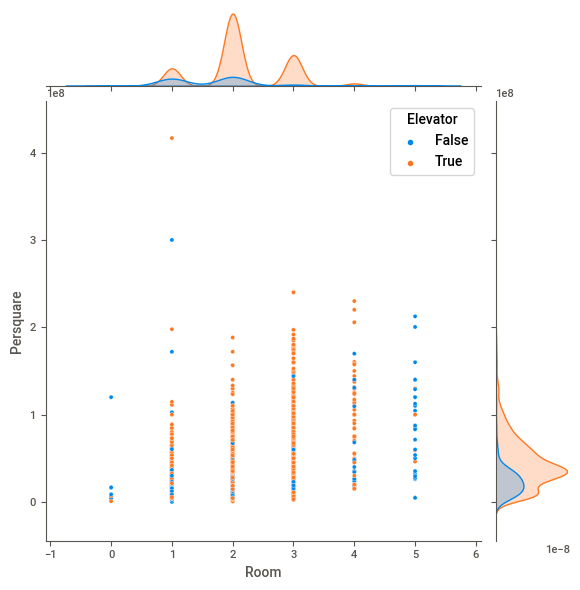

In [ ]:
sns.jointplot(data=df, x='Room', y='Persquare', hue='Elevator')

**Data Cleaning**

Handling categorical features (Encoding)

In [ ]:
Areacat={'30-70':0,
      '70-150':1,
      '>150':2}
df['Areacat']=df['Areacat'].map(Areacat)


In [ ]:
Persquarecat={'low':0,
            'medium':1,
            'high':2,
            'luxury':3}
df['Persquarecat']=df['Persquarecat'].map(Persquarecat)

In [ ]:
from sklearn.preprocessing import LabelEncoder 

In [ ]:
lb=LabelEncoder()
columns=['Parking', 'Elevator', 'Warehouse']
for col in columns:
  df[col]=lb.fit_transform(df[col])



In [ ]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Areacat,Persquare,Persquarecat
0,63,1,1,1,1,Shahran,1850000000.00000,61666.67000,0,29365079.36508,1
1,60,1,1,1,1,Shahran,1850000000.00000,61666.67000,0,30833333.33333,1
2,79,2,1,1,1,Pardis,550000000.00000,18333.33000,1,6962025.31646,0
3,95,2,1,1,1,Shahrake Qods,902500000.00000,30083.33000,1,9500000.00000,0
4,123,2,1,1,1,Shahrake Gharb,7000000000.00000,233333.33000,1,56910569.10569,2


In [ ]:
df.isnull().sum()

Area            0
Room            0
Parking         0
Warehouse       0
Elevator        0
Address         0
Price           0
Price(USD)      0
Areacat         0
Persquare       0
Persquarecat    0
Address_n       0
dtype: int64

Filling missing values with mode

In [ ]:
df['Address'].fillna(df['Address'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

Area            0
Room            0
Parking         0
Warehouse       0
Elevator        0
Address         0
Price           0
Price(USD)      0
Areacat         0
Persquare       0
Persquarecat    0
dtype: int64

Encoding address feature based on their price

In [ ]:
Address_df=df.groupby('Address').mean()['Price'].reset_index()
Address_df=Address_df.sort_values(by=['Price']).reset_index()
Address_df.insert(0, 'encodedAddress', range(1, 193))

df1=pd.Series(Address_df.encodedAddress.values, index=Address_df.Address).to_dict()
df['Address_n']=df['Address'].map(df1)

In [ ]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Areacat,Persquare,Persquarecat,Address_n
0,63,1,1,1,1,Shahran,1850000000.00000,61666.67000,0,29365079.36508,1,99
1,60,1,1,1,1,Shahran,1850000000.00000,61666.67000,0,30833333.33333,1,99
2,79,2,1,1,1,Pardis,550000000.00000,18333.33000,1,6962025.31646,0,16
3,95,2,1,1,1,Shahrake Qods,902500000.00000,30083.33000,1,9500000.00000,0,27
4,123,2,1,1,1,Shahrake Gharb,7000000000.00000,233333.33000,1,56910569.10569,2,175


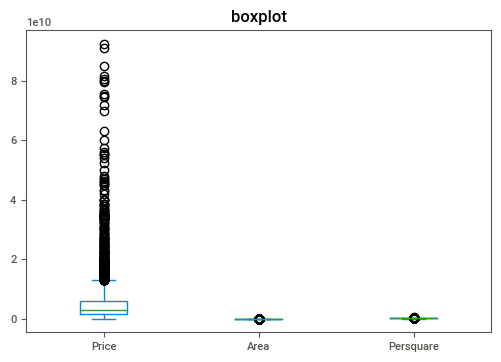

In [ ]:
import matplotlib.pyplot as plt
ax = df[['Price', 'Area', 'Persquare']].plot(kind='box', title='boxplot')


plt.show()

Detecting outlier numbers in price feature by IQR method

In [ ]:
lower_quantile = df['Price'].quantile(0.25)
upper_quantile = df['Price'].quantile(0.75)
IQR = upper_quantile - lower_quantile

lower_bound = lower_quantile - 1.5 * IQR
upper_bound = upper_quantile + 1.5 * IQR

price_bounds={}
price_bounds['Price'] = [lower_bound, upper_bound]
dfiqrprice=df[(df['Price']<price_bounds['Price'][0]) | (df['Price']>price_bounds['Price'][1])]

print('Identified Outliers in Price: %d' % len(dfiqrprice))


Identified Outliers in Price: 309


**Machine Learning Models**

Splitting data into training and test (With outliers)




In [ ]:
X=df.drop(['Price(USD)', 'Price', 'Address'], axis=1)

y=df['Price']


Splitting data into training and test (Without outliers)


In [ ]:
x=dfiqrprice.drop(['Price(USD)', 'Price', 'Address'], axis=1)
Y=dfiqrprice['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=100)
x_train, x_test, Y_train, Y_test=train_test_split(x, Y, test_size=0.3, random_state=100)

Feature Selection based on correlation statistics (with outliers)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

def select_features(X_train, y_train, X_test):
  fs=SelectKBest(score_func=f_regression, k='all')
  fs.fit(X_train, y_train)
  X_train_fs=fs.transform(X_train)
  X_test_fs=fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

def select_features2(X_train, y_train, X_test):
  fs2=SelectKBest(score_func=f_regression, k=4)
  fs2.fit(X_train, y_train)
  X_train_fs2=fs2.transform(X_train)
  X_test_fs2=fs2.transform(X_test)
  return X_train_fs2, X_test_fs2, fs2

X_train_fs, X_test_fs, fs=select_features(X_train, y_train, X_test)
X_train_fs2, X_test_fs2, fs2=select_features2(X_train, y_train, X_test)


1: all features 

2: using correlation features (all)

3: using correlation features (k=4)

Applying LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model=LinearRegression()
model2=LinearRegression()
model3=LinearRegression()


model.fit(X_train, y_train)
model2.fit(X_train_fs, y_train)
model3.fit(X_train_fs2, y_train) 


ypred1=model.predict(X_test)
ypred2=model2.predict(X_test_fs)
ypred3=model3.predict(X_test_fs2)


mae1=mean_absolute_error(y_test, ypred1)
mae2=mean_absolute_error(y_test, ypred2)
mae3=mean_absolute_error(y_test, ypred3)


print('MAE FOR ALL FEATURES: %.3f'%mae1)
print('MAE FOR ALL FEATURES (CORRELATION STATISTICS): %.3f'%mae2)
print('MAE FOR 4 FEATURES(CORRELATION STATISTICS): %.3f'%mae3)


MAE FOR ALL FEATURES: 1552346449.611
MAE FOR ALL FEATURES (CORRELATION STATISTICS): 1552346449.611
MAE FOR 4 FEATURES(CORRELATION STATISTICS): 1867558046.154


In [ ]:
model.coef_  #All features


array([ 2.06959276e+07,  1.88643154e+09, -7.55253243e+08,  3.29684457e+08,
       -1.26439743e+09,  6.13240850e+08,  2.18580283e+02, -8.26900264e+08,
       -2.37863053e+07])

In [ ]:
model2.coef_ #All features (correlation statistics)

array([ 2.06959276e+07,  1.88643154e+09, -7.55253243e+08,  3.29684457e+08,
       -1.26439743e+09,  6.13240850e+08,  2.18580283e+02, -8.26900264e+08,
       -2.37863053e+07])

In [ ]:
model3.coef_ #4 Features (correlation statistics)

array([ 3.21352901e+09,  2.37642718e+02, -1.79648199e+09, -1.87531371e+07])

In [ ]:
print('Intercept: {:.3f}'.format(model.intercept_))
print()
print('Intercept all features: {:.3f}'.format(model2.intercept_))
print()
print('Intercept 4 fetures: {:.3f}'.format(model3.intercept_))

Intercept: -5640949818.390

Intercept all features: -5640949818.390

Intercept 4 fetures: -7281620346.937


In [ ]:
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))
print("Training set score: {:.2f}".format(model.score(X_train, y_train)))
print()
print("Test set score (all features): {:.2f}".format(model2.score(X_test_fs, y_test)))
print("Training set score (all features): {:.2f}".format(model2.score(X_train_fs, y_train)))
print()
print("Test set score (4 features): {:.2f}".format(model3.score(X_test_fs2, y_test)))
print("Training set score (4 features): {:.2f}".format(model3.score(X_train_fs2, y_train)))

Test set score: 0.86
Training set score: 0.78

Test set score (all features): 0.86
Training set score (all features): 0.78

Test set score (4 features): 0.81
Training set score (4 features): 0.72


Feature Selection based on correlation statistics (without outliers)

In [ ]:
def select_features(x_train, Y_train, x_test):
  fs=SelectKBest(score_func=f_regression, k='all')
  fs.fit(x_train, Y_train)
  x_train_fs=fs.transform(x_train)
  x_test_fs=fs.transform(x_test)
  return x_train_fs, x_test_fs, fs

def select_features2(x_train, Y_train, x_test):
  fs2=SelectKBest(score_func=f_regression, k=4)
  fs2.fit(x_train, Y_train)
  x_train_fs2=fs2.transform(x_train)
  x_test_fs2=fs2.transform(x_test)
  return x_train_fs2, x_test_fs2, fs2

x_train_fs, x_test_fs, fs=select_features(x_train, Y_train, x_test)
x_train_fs2, x_test_fs2, fs2=select_features2(x_train, Y_train, x_test)

In [ ]:
model=LinearRegression()
model2=LinearRegression()
model3=LinearRegression()


model.fit(x_train, Y_train)
model2.fit(x_train_fs, Y_train)
model3.fit(x_train_fs2, Y_train) 


Ypred1=model.predict(x_test)
Ypred2=model2.predict(x_test_fs)
Ypred3=model3.predict(x_test_fs2)


mae1=mean_absolute_error(Y_test, Ypred1)
mae2=mean_absolute_error(Y_test, Ypred2)
mae3=mean_absolute_error(Y_test, Ypred3)

print('MAE FOR ALL FEATURES: %.3f'%mae1)
print('MAE FOR ALL FEATURES (CORRELATION STATISTICS): %.3f'%mae2)
print('MAE FOR 4 FEATURES(CORRELATION STATISTICS): %.3f'%mae3)

MAE FOR ALL FEATURES: 3251181395.920
MAE FOR ALL FEATURES (CORRELATION STATISTICS): 3251181395.920
MAE FOR 4 FEATURES(CORRELATION STATISTICS): 3368648603.056


In [ ]:
print("Test set score: {:.2f}".format(model.score(x_test, Y_test)))
print("Training set score: {:.2f}".format(model.score(x_train, Y_train)))
print()
print("Test set score (all features): {:.2f}".format(model2.score(x_test_fs, Y_test)))
print("Training set score (all features): {:.2f}".format(model2.score(x_train_fs, Y_train)))
print()
print("Test set score (4 features): {:.2f}".format(model3.score(x_test_fs2, Y_test)))
print("Training set score (4 features): {:.2f}".format(model3.score(x_train_fs2, Y_train)))

Test set score: 0.69
Training set score: 0.96

Test set score (all features): 0.69
Training set score (all features): 0.96

Test set score (4 features): 0.67
Training set score (4 features): 0.96


**Feature Selection using RFE**

With outliers

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std

rfe=RFE(estimator=DecisionTreeRegressor(), n_features_to_select=4)
model=DecisionTreeRegressor()
pipeline=Pipeline(steps=[('s', rfe), ('m', model)])

#evaluate model
cv=RepeatedKFold(n_splits=9, n_repeats=3, random_state=1)
n_scores=cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


MAE: -284992326.369 (59259343.793)


without outliers

In [ ]:
rfe2=RFE(estimator=DecisionTreeRegressor(), n_features_to_select=4)
model=DecisionTreeRegressor()
pipeline=Pipeline(steps=[('s', rfe2), ('m', model)])

#evaluate model
cv=RepeatedKFold(n_splits=9, n_repeats=3, random_state=1)
n_scores=cross_val_score(pipeline, x, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


MAE: -2068270090.278 (837341024.116)


Using cross validation with outliers

In [ ]:
from sklearn.model_selection import cross_val_score
cv_results=cross_val_score(model, X, y, cv=5)
print(cv_results)
np.mean(cv_results)

[ 0.87868858  0.84314992  0.8020961  -0.04976889  0.33966656]


0.5627664545101734

cross validation without outliers

In [ ]:

cv_results3=cross_val_score(model, x, Y, cv=5)
print(cv_results3)
np.mean(cv_results3)

[0.92701724 0.96162434 0.91792834 0.93885691 0.55848542]


0.8607824517123293

Applying Ridge Regression (L2 regularization)

In [ ]:
from sklearn.linear_model import Ridge

ridge=Ridge(alpha=0.1)
ridge2=Ridge(alpha=0.1)

In [ ]:
ridge.fit(X_train, y_train)  #with outliers
ridge_pred=ridge.predict(X_test)
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))

Test set score: 0.86
Training set score: 0.78


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.54578e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [ ]:
ridge2.fit(x_train, Y_train)  #without outliers
ridge2_pred=ridge2.predict(x_test)
print("Test set score: {:.2f}".format(ridge2.score(x_test, Y_test)))
print("Training set score: {:.2f}".format(ridge2.score(x_train, Y_train)))

Test set score: 0.69
Training set score: 0.96


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.37272e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Applying lasso regression (L1 regularization)

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso().fit(X_train, y_train)
lasso2=Lasso().fit(x_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.487e+22, tolerance: 1.720e+19
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train))) #with outliers
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {:.2f}".format(np.sum(lasso.coef_!=0)))

Training set score: 0.78
Test set score: 0.86
Number of features used: 9.00


In [ ]:
print("Training set score: {:.2f}".format(lasso2.score(x_train, Y_train))) #without outliers
print("Test set score: {:.2f}".format(lasso2.score(x_test, Y_test)))
print("Number of features used: {:.2f}".format(np.sum(lasso2.coef_!=0)))

Training set score: 0.96
Test set score: 0.69
Number of features used: 9.00


Applying Bayesian Regression

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score
bay=BayesianRidge() 
bay.fit(X_train, y_train)  #with outliers
prediction=bay.predict(X_test)
print(f'r2 score of test set: {r2_score(y_test, prediction)}')

r2 score of test set: 0.7248310526844081


In [ ]:
bay2=BayesianRidge()
bay2.fit(x_train, Y_train) #without outliers
prediction=bay2.predict(x_test)
print(f'r2 score of test set: {r2_score(Y_test, prediction)}')

r2 score of test set: -0.056331960824050675
